In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
import itertools

In [11]:
import HTSeq
import pysam

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [13]:
import seaborn as sns
sns.__version__

'0.11.1'

In [14]:
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

In [33]:
#annotation_file = "/gcm-lfs1/pablo/data/rna_silencing/annotation/gff_v2/Schizosaccharomyces_pombe_all_chromosomes.extended.features.csv"

In [35]:
#df = pd.read_csv(annotation_file, sep='\t')
#df.head()

In [36]:
#all_repeats_df = df[df['category'] == 'repeat']
#all_repeats_df

In [37]:
#all_repeats_df.to_csv('~/repeats_df.tsv', sep='\t', index=False)

In [38]:
#deg1

In [39]:
#deg2

In [40]:
#deg3

In [41]:
#non_degraded

In [42]:
#het_genes

In [43]:
#df[~df['gene_id'].isin(het_genes)]
#all_repeats_df[~all_repeats_df['gene_id'].isin(het_genes)]

------------------------------

## Config

In [17]:
import sys

In [18]:
project_dir = '/home/pmonteagudo/workspace/silencing_project'
if project_dir not in sys.path: 
    sys.path.append(project_dir)
from config_analysis import *

In [19]:
# needed to import all our code
my_scripts_dir = os.path.join(project_dir, 'htseq/scripts')
if my_scripts_dir not in sys.path:
    sys.path.append(my_scripts_dir)

In [20]:
import coverage as cov

In [11]:
import estimate_input_factor as ip

- other **directories**

In [12]:
data_dir

'/gcm-lfs1/pablo/data/rna_silencing/seq_data'

In [13]:
results_dir = data_results_dir
results_dir

'/gcm-lfs1/pablo/data/rna_silencing/results'

------

# INPUT Normalization: **Centromeric region**

------------

## Workflow

- Load `sample` and corresponding `INPUT` BAM files.
- Create coverage for region of interest: 
    - **Centromer_I**: `chr I - 3,765,776 - 3,776,547`
    - **Centromer_II**: `chr II - 1,619,269 - 1,629,017`
    - **Centromer_III**: `chr III - 1,093,002 - 1,105,987`
- Using [`fragment_size`](https://htseq.readthedocs.io/en/master/tss.html#using-the-full-coverage) `= None`

--------------------------

In [14]:
#list(cvg[window])

--------------------------

### Define Parameters

In [15]:
ip_type = 'S2'
#ip_type = 'S5'

- Define `ChIP` sample and corresponding `INPUT`

In [16]:
mutant_id = "WT" 
#mutant_id = "638" # ago1
#mutant_id = "491" # mit1d
#mutant_id = "504" # rrp6d

In [17]:
replicate_chip = "1"
#replicate_chip = "3"
replicate_ip = "1"

In [18]:
data_batch = 'S2-ChIP'
data_input_batch = 'INPUT'

In [19]:
#dataset_id =  "WT_H3K9me2_1"
dataset_id =  mutant_id + "_" + data_batch + "_" + replicate_chip
print("Used ChIP `dataset_id`:", dataset_id)
merged_dataset_id = mutant_id + "_" + data_batch

#input_dataset_id = "WT_S2-ChIP-INPUT_1"
input_dataset_id =  mutant_id + "_" + ip_type + "-ChIP-" + data_input_batch + "_" + replicate_ip
print("Used INPUT `dataset_id`:", input_dataset_id)


Used ChIP `dataset_id`: WT_S2-ChIP_3
Used INPUT `dataset_id`: WT_S2-ChIP-INPUT_1


- Load `BAM` files: instantiate BAM_Reader Object

In [20]:
bam_file = os.path.join(data_dir, data_batch, "bam", dataset_id, dataset_id + ".Aligned.sortedByCoord.out.bam")
#print(bam_file)
#bam = HTSeq.BAM_Reader(bam_file)

In [21]:
input_bam_file =  os.path.join(data_dir, data_input_batch, "bam", input_dataset_id, input_dataset_id +  ".Aligned.sortedByCoord.out.bam")
#print(input_bam_file)
#input_bam = HTSeq.BAM_Reader(input_bam_file)

- Define characteristics for **coverage interval**: 

**Centromeric regions** between consecutive dg/dh Heterochromatin peaks in WT 65_H3k9me2 sample

In [22]:
# instead we can follow:
# => https://htseq.readthedocs.io/en/master/tss.html#using-indexed-bam-filehttps://htseq.readthedocs.io/en/master/tss.html#using-indexed-bam-files
i_1 = {'id':'centromer_I', 'chrom':'I', 'start': 3765776, 'end': 3776547}
i_2 = {'id':'centromer_II', 'chrom':'II', 'start': 1619269, 'end': 1629017}
i_3 = {'id':'centromer_III', 'chrom':'III', 'start': 1093002, 'end': 1105987}
genomic_intervals = [i_1, i_2, i_3]

In [23]:
#fragment_size = 500
#fragment_size = 200
fragment_size = None

--------------------------

## **ChIP Sample**

- Instantiate a `GenomicArray` object for the **WT sample** coverage (`cvg`)

In [24]:
cvg = cov.coverage_genomic_intervals(bam_file, genomic_intervals, count_type="frac", fragment_size=fragment_size)

Loading BAM file ...
/gcm-lfs1/pablo/data/rna_silencing/seq_data/S2-ChIP/bam/WT_S2-ChIP_3/WT_S2-ChIP_3.Aligned.sortedByCoord.out.bam
Done.

Add padding: 0 

Genomic Regions:
	- I:3765776-3776547 (10.77 kb)
	- II:1619269-1629017 (9.75 kb)
	- III:1093002-1105987 (12.98 kb)


- **Visualize coverage** (`cvg`) in the genomic intervals of interest - return `cvg_profiles` as np.array()

In [25]:
cvg_profiles = {}
total_cvg = {}

In [26]:
figsize = (20, 10)

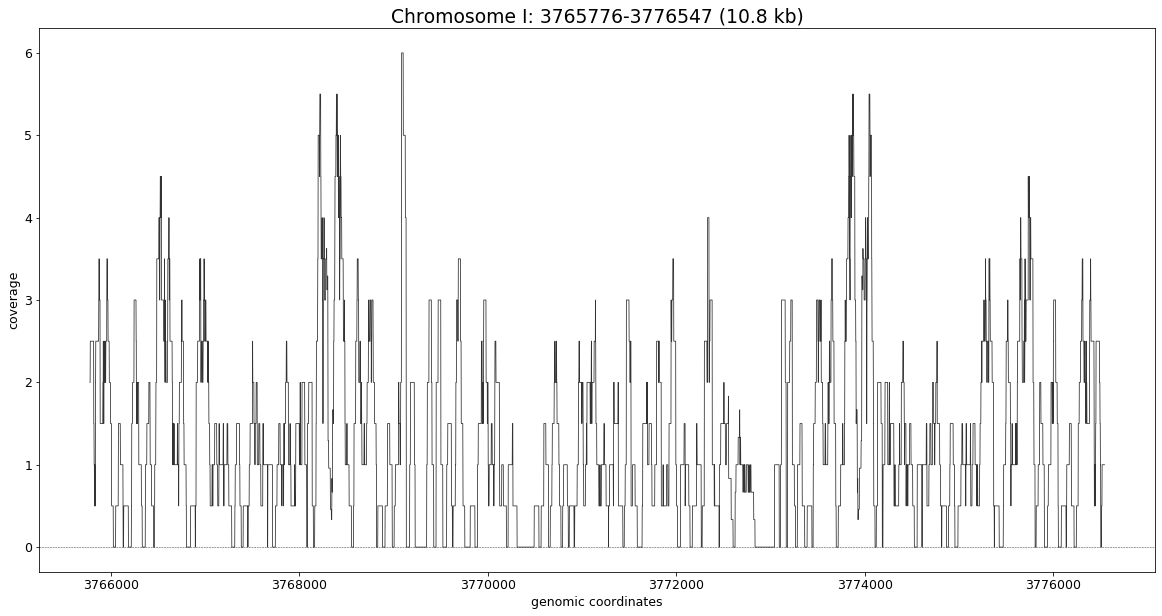

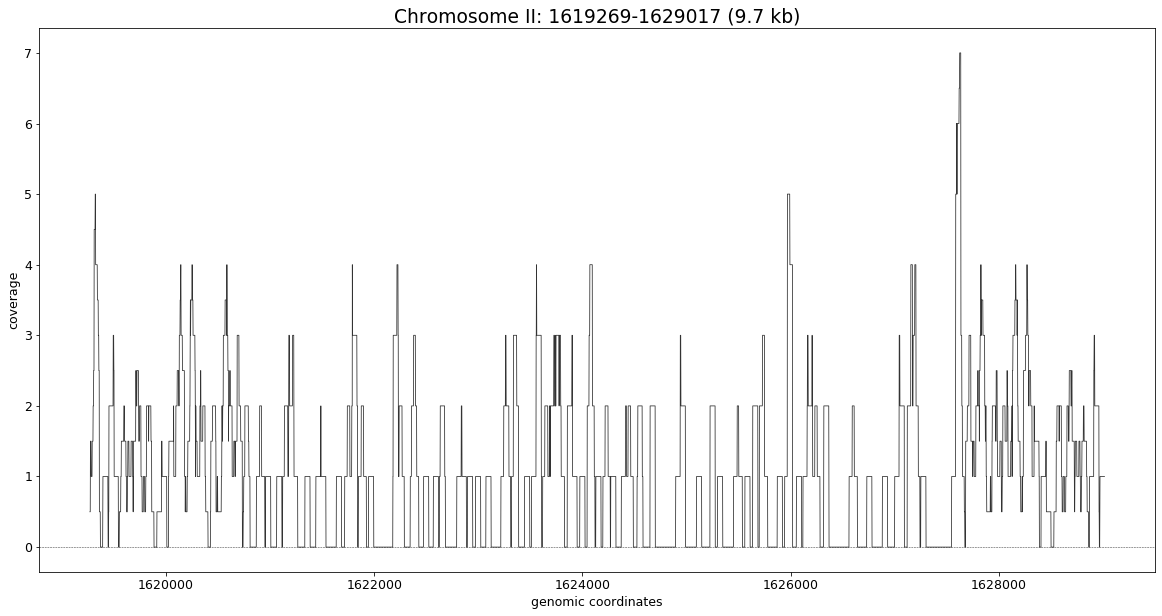

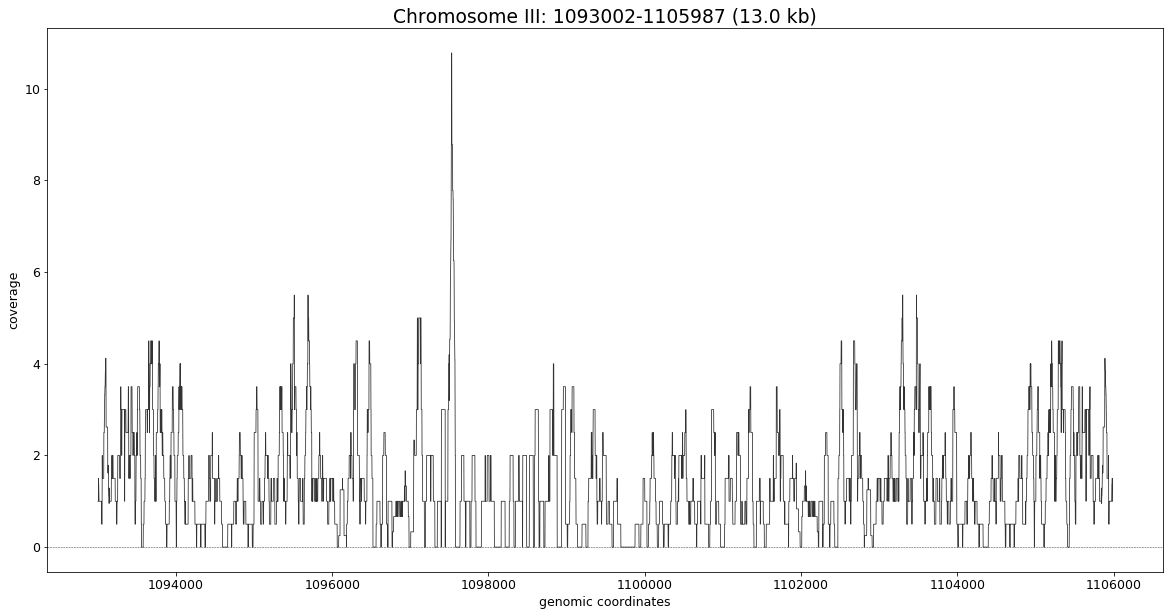

In [27]:
for ii, gg_i in enumerate(genomic_intervals):
    # only plot first regions if there are too many
    if (ii < 3):
    #if (ii < 1):
        cvg_profiles[gg_i["id"]] = cov.plot_coverage_interval(gg_i, cvg, figsize=figsize)
    else:
        cvg_profiles[gg_i["id"]] = cov.plot_coverage_interval(gg_i, cvg, plot_coverage=False)
        
    assert len(cvg_profiles[gg_i["id"]]) == gg_i['end'] - gg_i['start']
    total_cvg[gg_i["id"]] = cvg_profiles[gg_i["id"]].sum()

In [28]:
#cvg_profiles

In [29]:
#total_cvg

- Import *mutant's* **ChIP** (TPM-normed) **gene expression Matrix**: `*_pombe_tpm_matrix.csv`

In [30]:
tpm_df_file = os.path.join(data_results_dir, data_batch, "xp_data", dataset_id, dataset_id + "_pombe_gene_count_matrix.csv")
#tpm_df_file = os.path.join(data_results_dir, data_batch, "xp_data", dataset_id, dataset_id + "_pombe_tpm_matrix.csv")
#tpm_df_file = os.path.join(data_results_dir, 'xp_data/ChIP/chip_median_wo_ip_subtraction/chip_merged_counts.csv')
tpm_df_file

'/gcm-lfs1/pablo/data/rna_silencing/results/xp_data/ChIP/chip_median_wo_ip_subtraction/chip_merged_counts.csv'

In [31]:
tpm_df = pd.read_csv(tpm_df_file, sep='\t', comment='#') # NAs here represent zeros counts, but there AREN'T any
                                                         # => every 'gene' contains at least some noise (which has been subtracted, Negative counts)
# needed for merged version
#tpm_df = tpm_df[['gene_id', 'gene_name', 'length', 'type', 'category', merged_dataset_id]].rename(columns={merged_dataset_id:'count'})
# ignore specific samples
tpm_df.head()   # with NH-norm: -
                # w/o NH-norm: 347.0 (WT_S2-ChIP_1)

,gene_id,gene_name,length,type,category,count
0,FP565355_region_1..2120,NaN,2120,region,repeat,479.0
1,FP565355_region_15417..15473,NaN,57,region,repeat,4.0
2,FP565355_region_15474..15608,NaN,135,region,repeat,27.0
3,FP565355_region_15609..16735,NaN,1127,region,repeat,253.0
4,FP565355_region_16736..16794,NaN,59,region,repeat,1.5


In [32]:
tpm_df.shape

(7021, 6)

In [33]:
#tpm_df.groupby('type').size()

- Check counts in the **centromeric region** used to compute **INPUT** `subtraction factor`

In [34]:
centromeric_tpm = tpm_df[tpm_df['category'] == "ip_region"].reset_index(drop=True)
centromeric_tpm['seq_category'] = 'S2-ChIP'
centromeric_tpm.head()

,gene_id,gene_name,length,type,category,count,seq_category
0,centromer_I,NaN,10772,ip_region,ip_region,24.5,S2-ChIP
1,centromer_II,NaN,9749,ip_region,ip_region,211.5,S2-ChIP
2,centromer_III,NaN,12986,ip_region,ip_region,77.5,S2-ChIP


--------------------------

### **INPUT Sample**

- Instantiate a `GenomicArray` object for the **INPUT sample** coverage (`input_cvg`)

In [35]:
input_cvg = cov.coverage_genomic_intervals(input_bam_file, genomic_intervals, count_type="frac", fragment_size=fragment_size)

Loading BAM file ...
/gcm-lfs1/pablo/data/rna_silencing/seq_data/INPUT/bam/WT_S2-ChIP-INPUT_1/WT_S2-ChIP-INPUT_1.Aligned.sortedByCoord.out.bam
Done.

Add padding: 0 

Genomic Regions:
	- I:3765776-3776547 (10.77 kb)
	- II:1619269-1629017 (9.75 kb)
	- III:1093002-1105987 (12.98 kb)


- **Visualize coverage** (`cvg`) in the genomic intervals of interest - return `input_cvg_profiles` as np.array()

In [36]:
input_cvg_profiles = {}
input_total_cvg = {}

In [37]:
figsize = (20, 10)

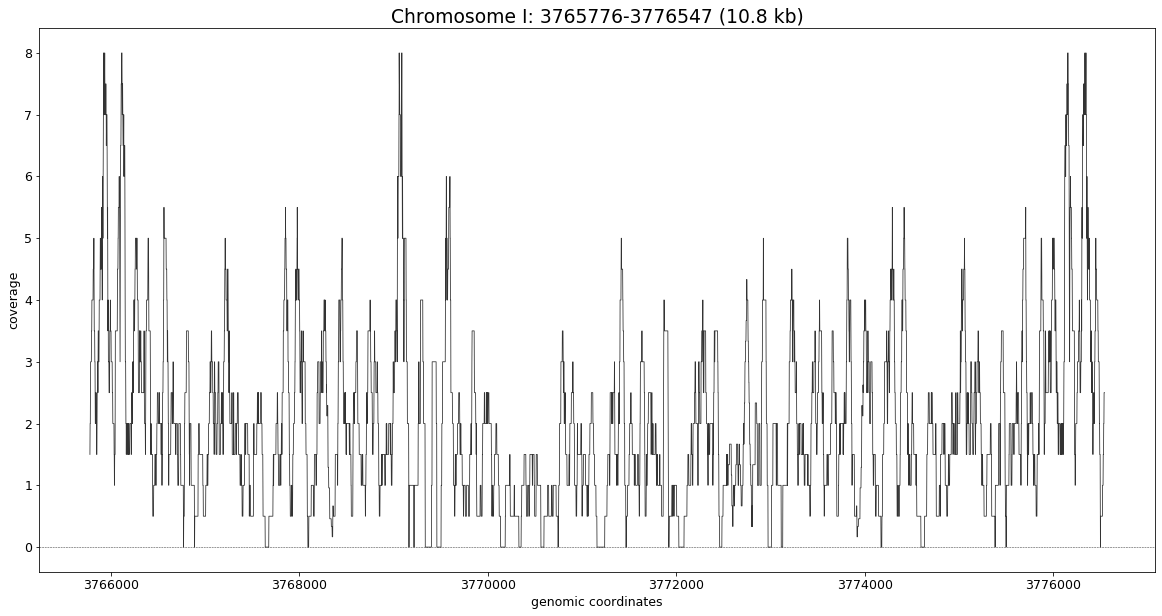

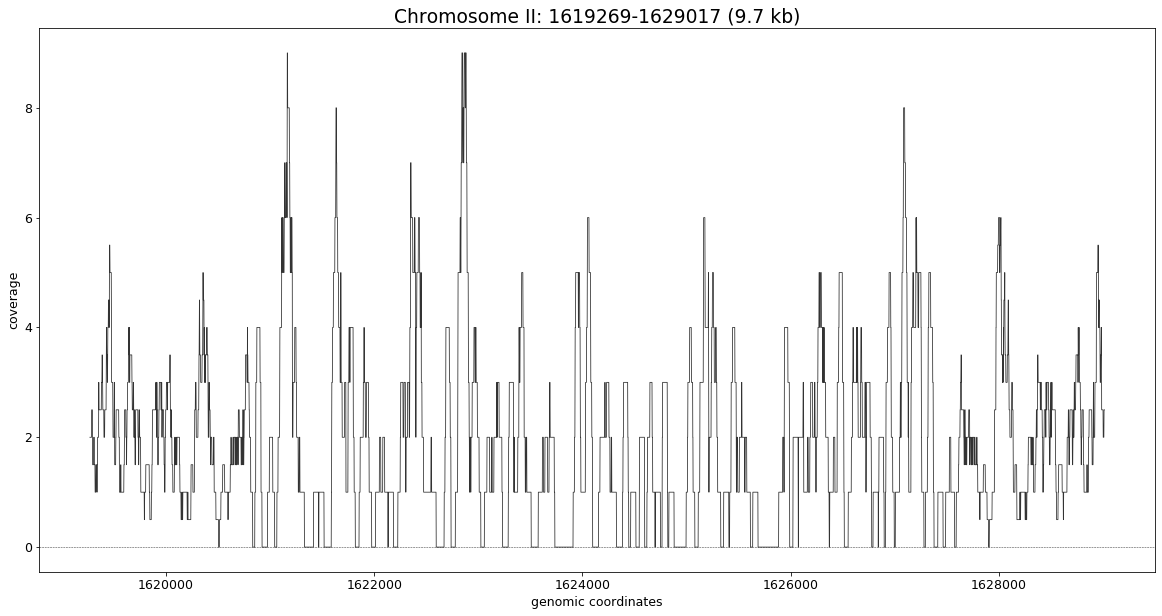

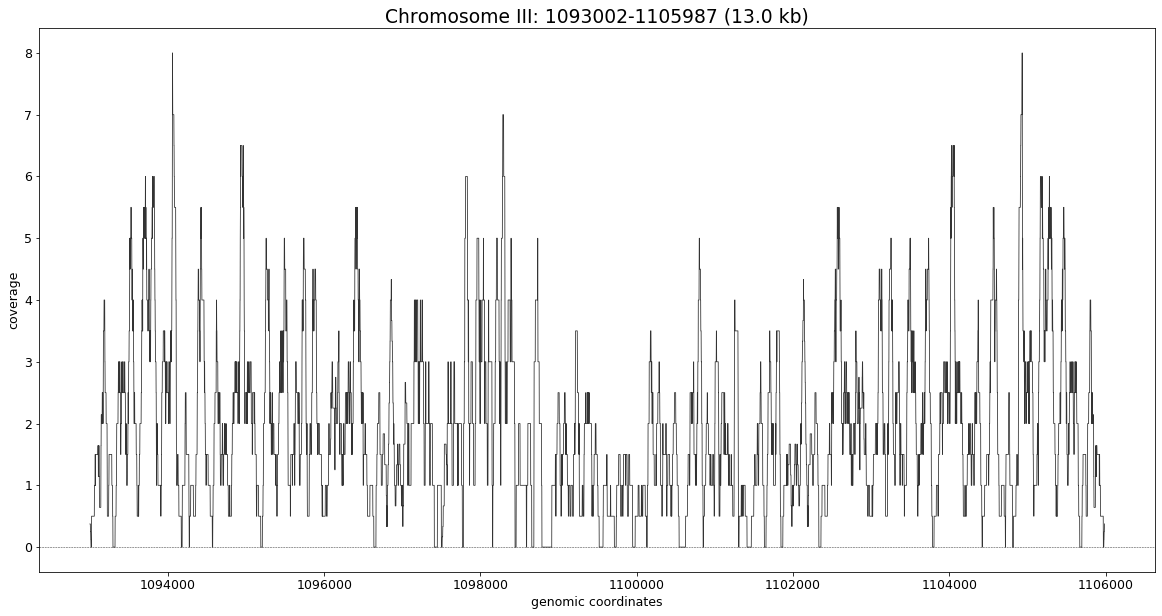

In [38]:
for ii, gg_i in enumerate(genomic_intervals):
    # only plot first regions if there are too many
    if (ii < 3):
        input_cvg_profiles[gg_i["id"]] = cov.plot_coverage_interval(gg_i, input_cvg, figsize=figsize)
    else:
        input_cvg_profiles[gg_i["id"]] = cov.plot_coverage_interval(gg_i, input_cvg, plot_coverage=False)
        
    assert len(input_cvg_profiles[gg_i["id"]]) == gg_i['end'] - gg_i['start']
    input_total_cvg[gg_i["id"]] = input_cvg_profiles[gg_i["id"]].sum()

In [39]:
#input_cvg_profiles

In [40]:
#input_total_cvg

- Import *mutant's* **INPUT** (TPM-normed) **gene expression Matrix**: `*_pombe_tpm_matrix.csv`

In [41]:
input_tpm_df_file = os.path.join(data_results_dir, data_input_batch, "xp_data", input_dataset_id, input_dataset_id + "_pombe_gene_count_matrix.csv")
#input_tpm_df_file = os.path.join(data_results_dir, data_input_batch, "xp_data", input_dataset_id, input_dataset_id + "_pombe_tpm_matrix.csv")
input_tpm_df_file

'/gcm-lfs1/pablo/data/rna_silencing/results/INPUT/xp_data/WT_S2-ChIP-INPUT_1/WT_S2-ChIP-INPUT_1_pombe_gene_count_matrix.csv'

In [42]:
input_tpm_df = pd.read_csv(input_tpm_df_file, sep='\t', comment='#') # NAs here represent zeros counts, but there AREN'T any
                                                                     # => every 'gene' contains at least some noise (which has been subtracted, Negative counts)
# ignore specific samples
input_tpm_df.head()   # with NH-norm: -
                # w/o NH-norm: 347.0 (WT_S2-ChIP_1)

,gene_id,count,gene_name,transcript_length,gene_length,type,category
0,SPBC460.01c,85.0,NaN,1719.0,1719,gene,gene
1,SPBC460.02c,61.0,NaN,663.0,948,gene,gene
2,SPBC460.03,108.0,vba2,1704.0,1704,gene,gene
3,SPBC460.04c,56.0,NaN,1176.0,1176,gene,gene
4,SPBC460.05,103.0,NaN,1593.0,1593,gene,gene


In [43]:
input_tpm_df.shape

(7021, 7)

In [44]:
#input_tpm_df.groupby('type').size()

- Check counts in the **centromeric region** used to compute **INPUT** `subtraction factor`

In [45]:
centromeric_input_tpm = input_tpm_df[input_tpm_df['category'] == "ip_region"].reset_index(drop=True)
centromeric_input_tpm['seq_category'] = 'INPUT'
centromeric_input_tpm.head()

,gene_id,count,gene_name,transcript_length,gene_length,type,category,seq_category
0,centromer_I,44.0,NaN,10772.0,10772,ip_region,ip_region,INPUT
1,centromer_II,259.0,NaN,9749.0,9749,ip_region,ip_region,INPUT
2,centromer_III,82.0,NaN,12986.0,12986,ip_region,ip_region,INPUT


------------

# Calculate **INPUT subtraction factor**

------------

## **A.** Compute Normalization Globally

- Loop over `genomic_intervals`

In [46]:
global_lambdas = {}
normed_cvg_profiles = {}
normed_total_cvg = {}

In [47]:
figsize = (20, 10)

Lambda: 0.6447096941816569 

Lambda: 0.5730120481927711 

Lambda: 0.720816131433592 



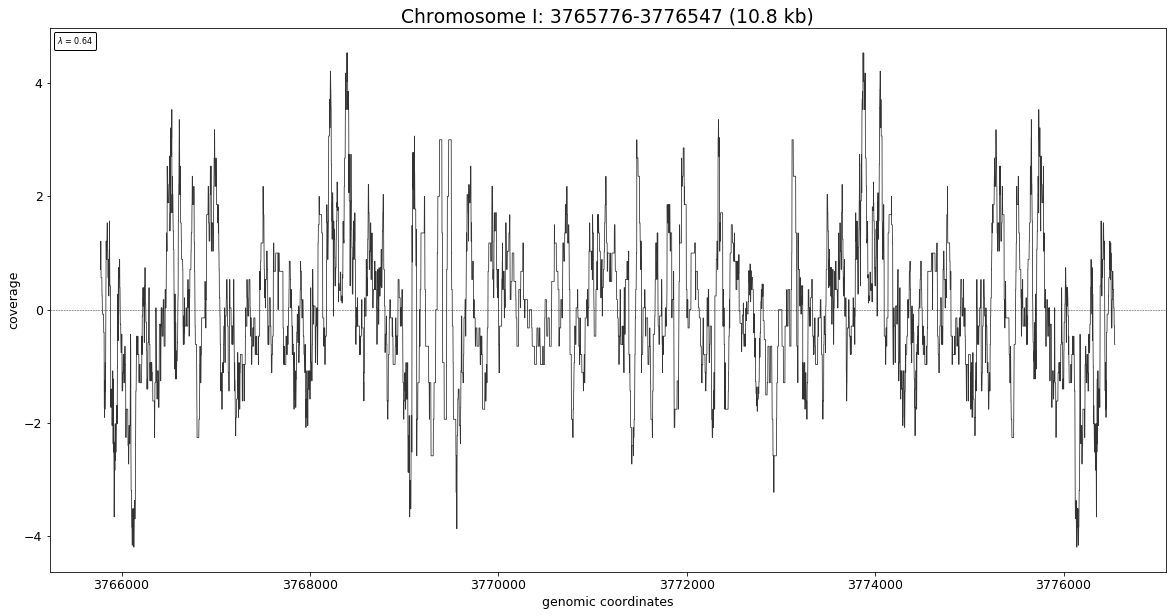

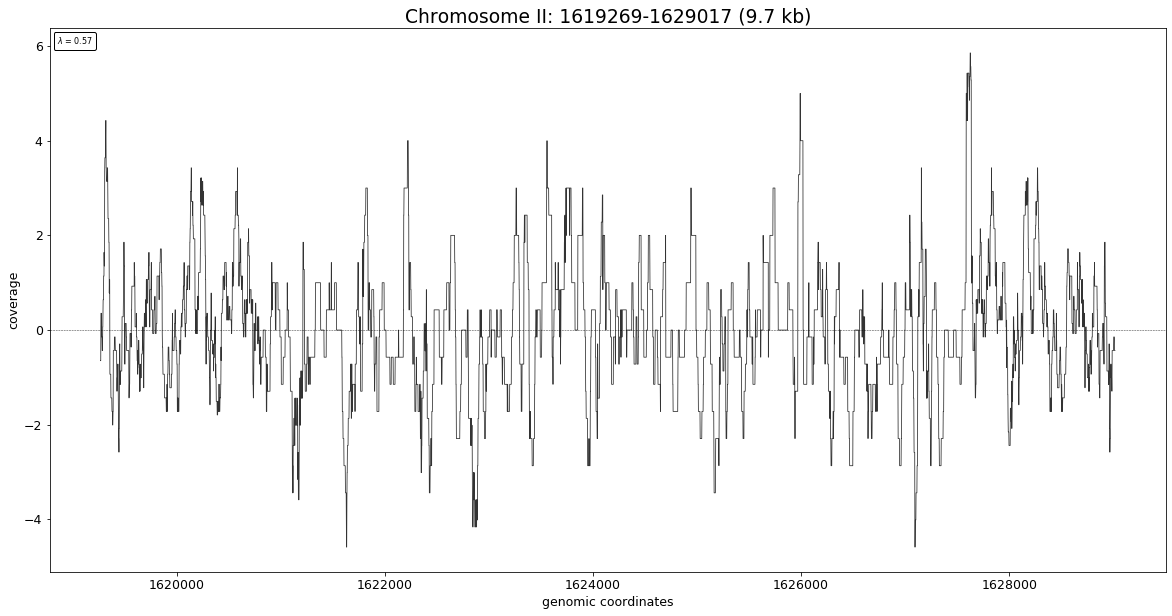

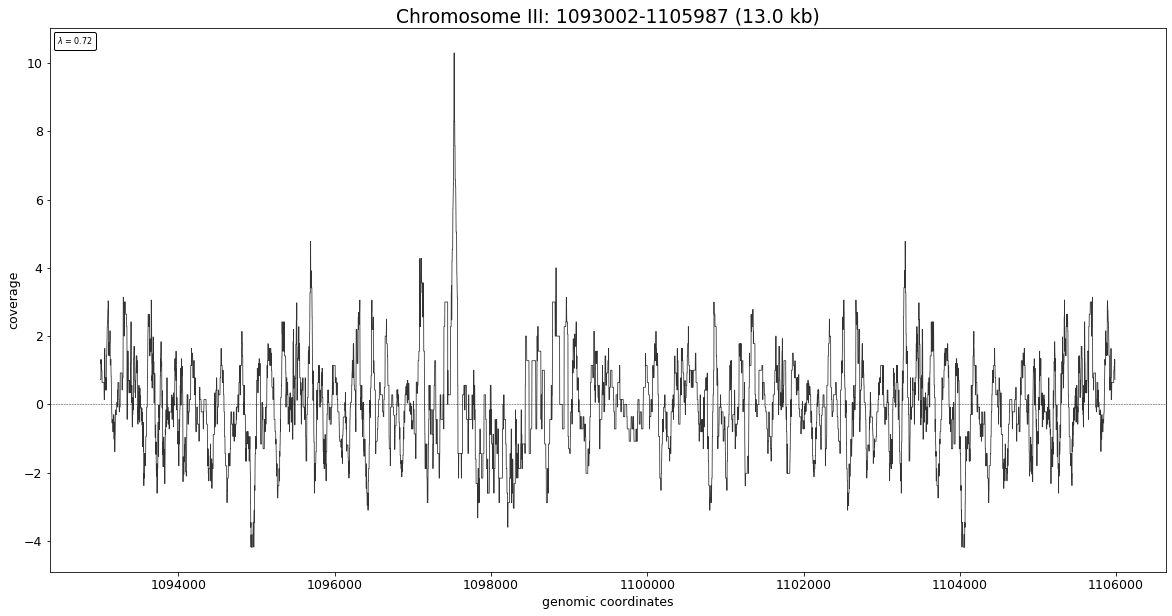

In [48]:
for ii, gg_i in enumerate(genomic_intervals):
    # only plot first regions if there are too many
    if (ii < 3):
        global_lambdas[gg_i["id"]], normed_cvg_profiles[gg_i["id"]] = ip.global_input_factor(gg_i, cvg_profiles, input_cvg_profiles, figsize=figsize)
    else:
        global_lambdas[gg_i["id"]], normed_cvg_profiles[gg_i["id"]] = ip.global_input_factor(gg_i, cvg_profiles, input_cvg_profiles, verbose=False, plot_coverage=False)
        
    assert len(normed_cvg_profiles[gg_i["id"]]) == gg_i['end'] - gg_i['start']
    # becareful with negative coverage!
    cvg_ii = normed_cvg_profiles[gg_i["id"]]
    cvg_ii[cvg_ii < 0] = 0
    normed_total_cvg[gg_i["id"]] = cvg_ii.sum()

In [49]:
#normed_cvg_profiles

In [50]:
#normed_total_cvg

- Compute the **percentage reduction** of the noise signal

In [51]:
normed_ratio_cvg = {kk: vv / total_cvg[kk] for kk, vv in normed_total_cvg.items()}
normed_ratio_cvg

{'centromer_I': 0.3829380559133868,
 'centromer_II': 0.47697305622827724,
 'centromer_III': 0.3680905829134579}

## **B.** Compute Normalization Locally: **Linear-regression**

- with `polyfit` can't fix the intercept = b = 0

In [52]:
#a, b = np.polyfit(window_input_cvg, window_cvg, 1, )

In [53]:
#b

- with `sklearn.linear_model.LinearRegression`

In [54]:
lregression_lambdas = {}
lregression_normed_cvg_profiles = {}
lregression_normed_total_cvg = {}

In [55]:
figsize = (20, 8)

Slope: 0.4813623306268622, Intercept: 0.0 

Slope: 0.34024776721405925, Intercept: 0.0 

Slope: 0.5296995623043632, Intercept: 0.0 



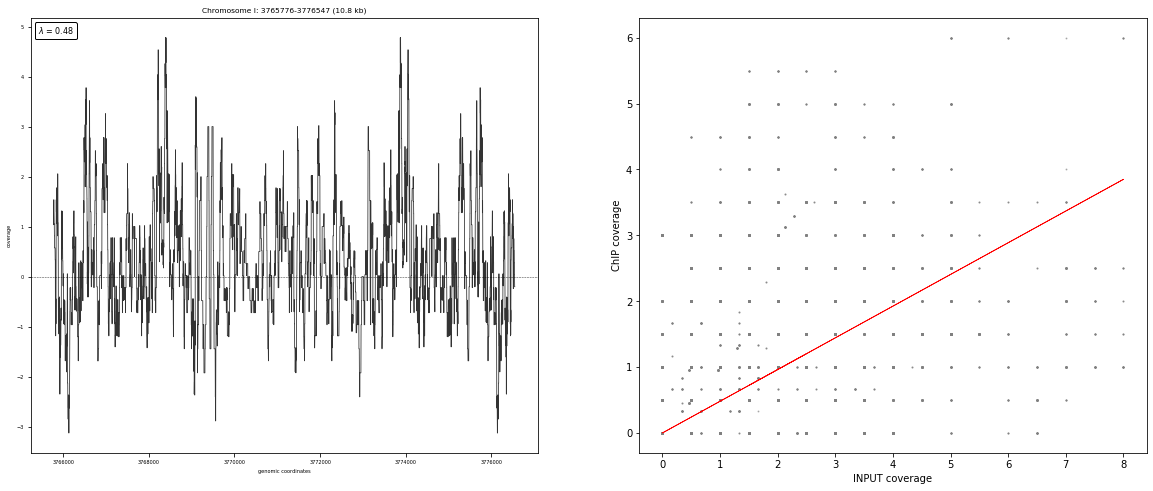

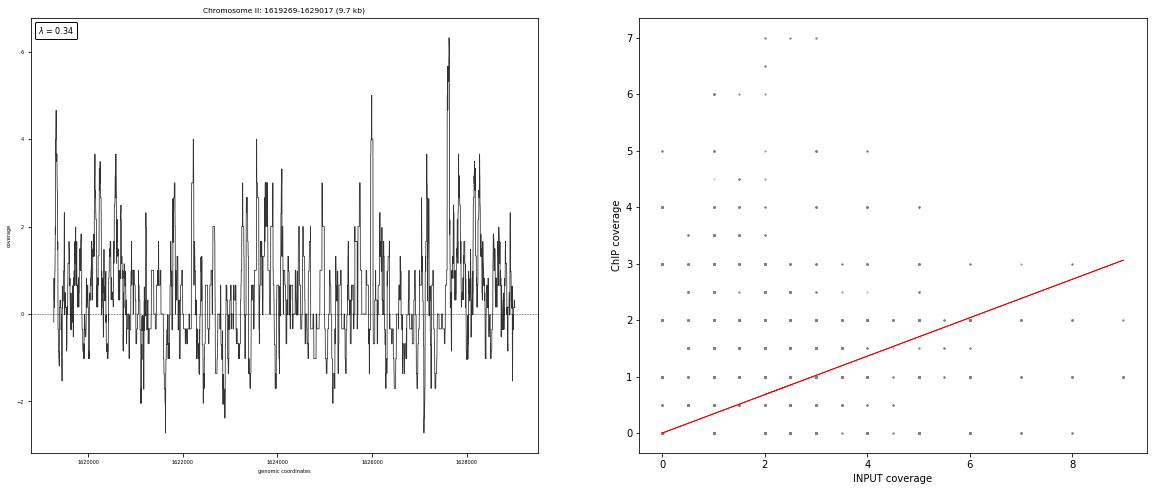

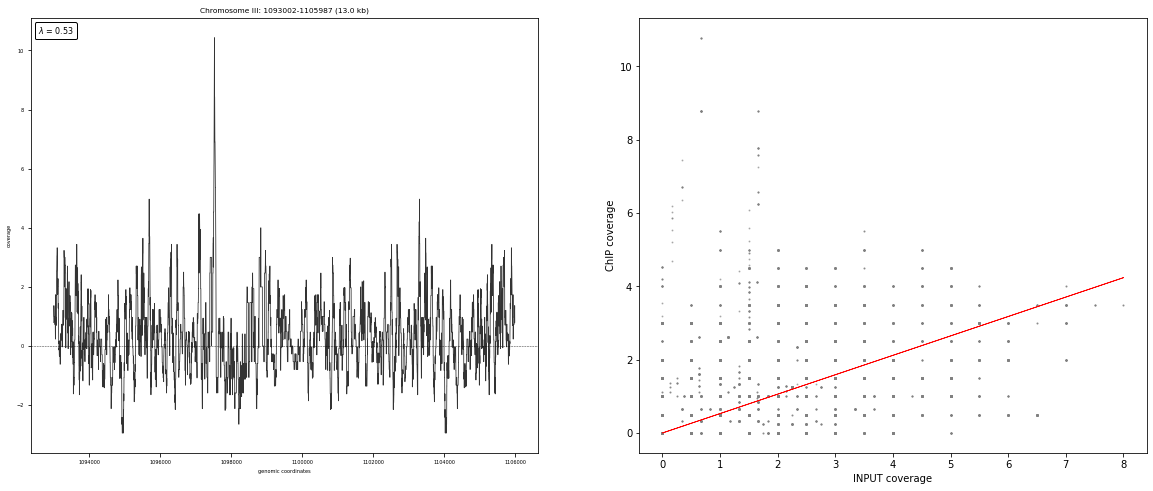

In [56]:
for ii, gg_i in enumerate(genomic_intervals):
    # only plot first regions if there are too many
    if (ii < 3):
        lregression_lambdas[gg_i["id"]], lregression_normed_cvg_profiles[gg_i["id"]] = ip.linear_regression_input_factor(gg_i, cvg_profiles, input_cvg_profiles, figsize=figsize)
    else: 
        lregression_lambdas[gg_i["id"]], lregression_normed_cvg_profiles[gg_i["id"]] = ip.linear_regression_input_factor(gg_i, cvg_profiles, input_cvg_profiles, verbose=False, plot_coverage=False)

    assert len(lregression_normed_cvg_profiles[gg_i["id"]]) == gg_i['end'] - gg_i['start']
    # becareful with negative coverage!
    cvg_ii = lregression_normed_cvg_profiles[gg_i["id"]]
    cvg_ii[cvg_ii < 0] = 0
    lregression_normed_total_cvg[gg_i["id"]] = cvg_ii.sum()
    

In [57]:
#lregression_normed_cvg_profiles

In [58]:
#lregression_normed_total_cvg

- Compute the **percentage reduction** of the noise signal

In [59]:
lregression_normed_ratio_cvg = {kk: vv / total_cvg[kk] for kk, vv in lregression_normed_total_cvg.items()}
lregression_normed_ratio_cvg

{'centromer_I': 0.4804723053596509,
 'centromer_II': 0.6254400169549337,
 'centromer_III': 0.47151263979941055}

## **C.** Compute Normalization Locally: $\lambda$ **Distributions**

In [60]:
dist_lambdas = {}
dist_normed_cvg_profiles = {}
dist_normed_total_cvg = {}

In [61]:
stat_param='mean'
#stat_param='max'

In [62]:
plot_distributions=False

In [63]:
figsize = (20, 10)

Removed `positions` causing problems:
 - Division 0/0 (Undetermined - NaN): 106
 - Division x/0 (Infinite - inf): 466
Use mean as summary statistic from lambda distibution: 0.8774985460824758

Removed `positions` causing problems:
 - Division 0/0 (Undetermined - NaN): 705
 - Division x/0 (Infinite - inf): 972
Use mean as summary statistic from lambda distibution: 0.7109787093370292

Removed `positions` causing problems:
 - Division 0/0 (Undetermined - NaN): 98
 - Division x/0 (Infinite - inf): 673
Use mean as summary statistic from lambda distibution: 0.9866662820403092



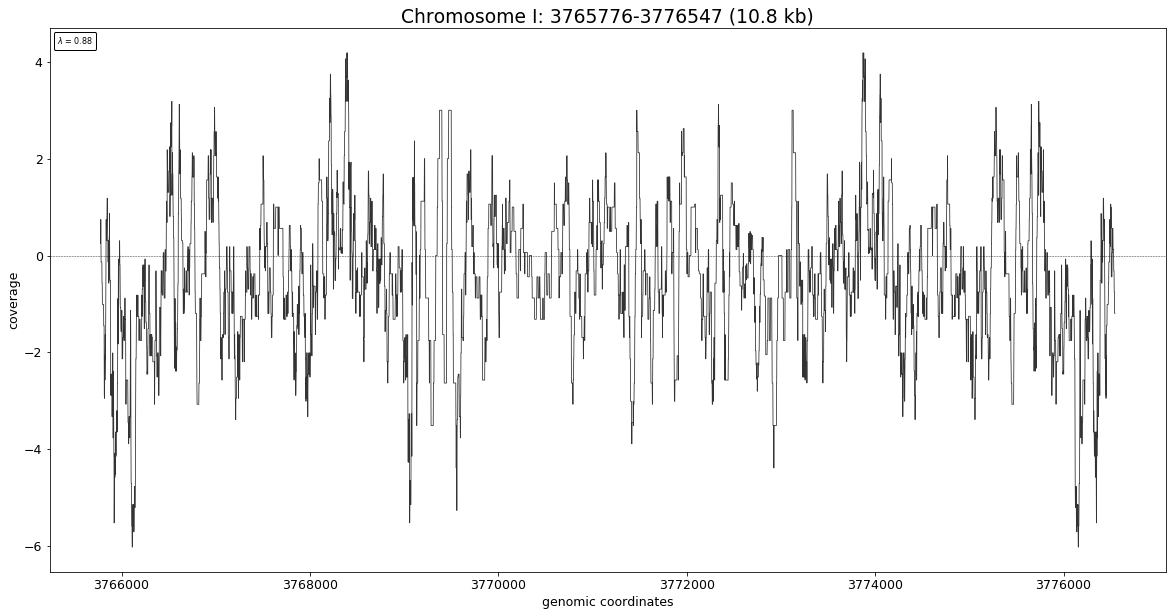

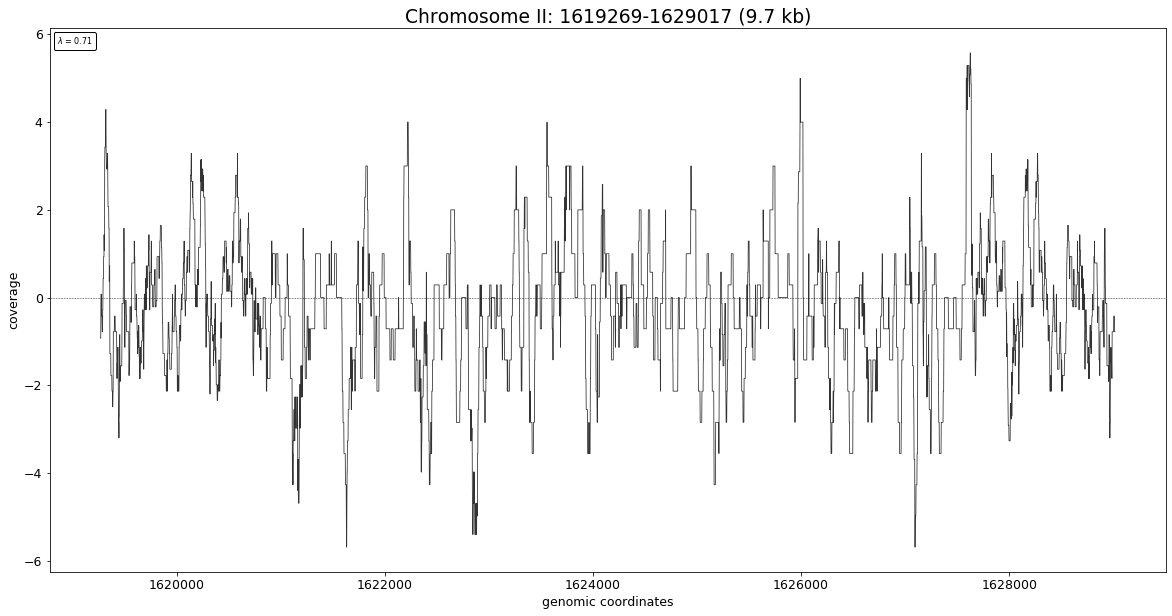

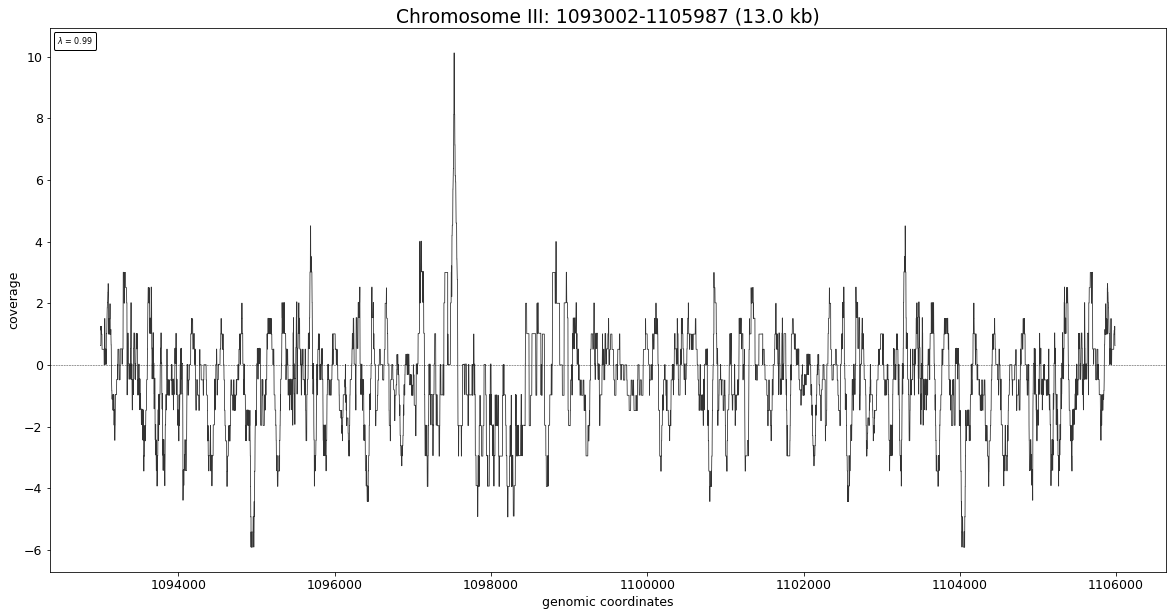

In [64]:
for ii, gg_i in enumerate(genomic_intervals):
    # only plot first regions if there are too many
    if (ii < 3):
        dist_lambdas[gg_i["id"]], dist_normed_cvg_profiles[gg_i["id"]] = ip.from_distribution_input_factor(gg_i, cvg_profiles, input_cvg_profiles, stat_param=stat_param, figsize=figsize, plot_distributions=False)
    else: 
        dist_lambdas[gg_i["id"]], dist_normed_cvg_profiles[gg_i["id"]] = ip.from_distribution_input_factor(gg_i, cvg_profiles, input_cvg_profiles, stat_param=stat_param, verbose=False, plot_coverage=False, plot_distributions=False)

    assert len(dist_normed_cvg_profiles[gg_i["id"]]) == gg_i['end'] - gg_i['start']
    # becareful with negative coverage!
    cvg_ii = dist_normed_cvg_profiles[gg_i["id"]]
    cvg_ii[cvg_ii < 0] = 0
    dist_normed_total_cvg[gg_i["id"]] = cvg_ii.sum()
    

In [65]:
#dist_normed_cvg_profiles

In [66]:
#dist_normed_total_cvg

- Compute the **percentage reduction** of the noise signal

In [67]:
dist_normed_ratio_cvg = {kk: vv / total_cvg[kk] for kk, vv in dist_normed_total_cvg.items()}
dist_normed_ratio_cvg

{'centromer_I': 0.2853389783236096,
 'centromer_II': 0.417395086689322,
 'centromer_III': 0.26810360112343434}

## **D.** Compute Normalization from counts: \$\lambda\$ **Counts**

In [68]:
centromeric_df = pd.concat([centromeric_tpm, centromeric_input_tpm])
count_lambda = centromeric_df.groupby('gene_id').apply(
    lambda group: group[group['seq_category'] == 'S2-ChIP']['count'] / group[group['seq_category'] == 'INPUT']['count']
).reset_index()[['gene_id', 'count']]
count_lambda

/home/pmonteagudo/anaconda3/envs/heterochromatin/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,gene_id,count
0,centromer_I,0.556818
1,centromer_II,0.816602
2,centromer_III,0.945122


In [69]:
count_lambda['count'].max().round(3)

0.945

-----

## **INPUT subtracted ChIP Sample**

- Import *mutant's* **INPUT subtracted ChIP** (TPM-normed) **gene expression Matrix**: `*_subtracted_INPUT_pombe_tpm_matrix.csv`

In [70]:
ip_subtracted_tpm_df_file = os.path.join(data_results_dir, data_batch, "xp_data", dataset_id, dataset_id + "_subtracted_INPUT_pombe_gene_count_matrix.csv")
#ip_subtracted_tpm_df_file = os.path.join(data_results_dir, data_batch, "xp_data", dataset_id, dataset_id + "_subtracted_INPUT_pombe_tpm_matrix.csv")
#ip_subtracted_tpm_df_file = os.path.join(data_results_dir, 'xp_data/ChIP/chip_median_with_ip_subtraction/chip_merged_counts.csv')
ip_subtracted_tpm_df_file

'/gcm-lfs1/pablo/data/rna_silencing/results/xp_data/ChIP/chip_median_with_ip_subtraction/chip_merged_counts.csv'

In [71]:
ip_subtracted_tpm_df = pd.read_csv(ip_subtracted_tpm_df_file, sep='\t', comment='#') # NAs here represent zeros counts, but there AREN'T any
                                                         # => every 'gene' contains at least some noise (which has been subtracted, Negative counts
# needed for merged version
#ip_subtracted_tpm_df = ip_subtracted_tpm_df[['gene_id', 'gene_name', 'length', 'type', 'category', merged_dataset_id]].rename(columns={merged_dataset_id:'count'})
# ignore specific samples
ip_subtracted_tpm_df.head()   
                # with NH-norm: -
                # w/o NH-norm: 347.0 (WT_S2-ChIP_1)

,gene_id,gene_name,length,type,category,count
0,FP565355_region_1..2120,NaN,2120,region,repeat,285.4895
1,FP565355_region_15417..15473,NaN,57,region,repeat,4.0000
2,FP565355_region_15474..15608,NaN,135,region,repeat,12.3030
3,FP565355_region_15609..16735,NaN,1127,region,repeat,175.4325
4,FP565355_region_16736..16794,NaN,59,region,repeat,1.5000


In [72]:
ip_subtracted_tpm_df.shape

(7021, 6)

In [73]:
#ip_subtracted_tpm_df.groupby('type').size()

- Check counts in the **centromeric region** used to compute **INPUT** `subtraction factor`

In [74]:
centromeric_ip_subtrated_tpm = ip_subtracted_tpm_df[ip_subtracted_tpm_df['category'] == "ip_region"].reset_index(drop=True)
centromeric_ip_subtrated_tpm['seq_category'] = 'S2-ChIP_IP-subtracted'
centromeric_ip_subtrated_tpm.head()

,gene_id,gene_name,length,type,category,count,seq_category
0,centromer_I,NaN,10772,ip_region,ip_region,0.000,S2-ChIP_IP-subtracted
1,centromer_II,NaN,9749,ip_region,ip_region,19.554,S2-ChIP_IP-subtracted
2,centromer_III,NaN,12986,ip_region,ip_region,10.547,S2-ChIP_IP-subtracted


- Concatenate different samples for **visualization**

In [75]:
#centromeric_df

In [76]:
#centromeric_df = pd.concat([centromeric_tpm, centromeric_input_tpm, centromeric_ip_subtrated_tpm])
centromeric_df = pd.concat([centromeric_tpm, centromeric_ip_subtrated_tpm], sort=True).reset_index(drop=True)
#norm_count_df = centromeric_df.groupby('gene_id').apply(
centromeric_df['norm_count'] = centromeric_df.groupby('gene_id').apply(
    lambda group: group['count'] / group['count'].max()
).reset_index(level=0, drop=True).sort_index()
centromeric_df

,category,count,gene_id,gene_name,length,seq_category,type,norm_count
0,ip_region,24.500,centromer_I,NaN,10772,S2-ChIP,ip_region,1.000000
1,ip_region,211.500,centromer_II,NaN,9749,S2-ChIP,ip_region,1.000000
2,ip_region,77.500,centromer_III,NaN,12986,S2-ChIP,ip_region,1.000000
3,ip_region,0.000,centromer_I,NaN,10772,S2-ChIP_IP-subtracted,ip_region,0.000000
4,ip_region,19.554,centromer_II,NaN,9749,S2-ChIP_IP-subtracted,ip_region,0.092454
5,ip_region,10.547,centromer_III,NaN,12986,S2-ChIP_IP-subtracted,ip_region,0.136090


In [77]:
centromeric_df_plot = centromeric_df
centromeric_df_plot['gene_id'] = centromeric_df_plot['gene_id'].apply(lambda x: ' '.join(['centromere', x.split('_')[1]]))

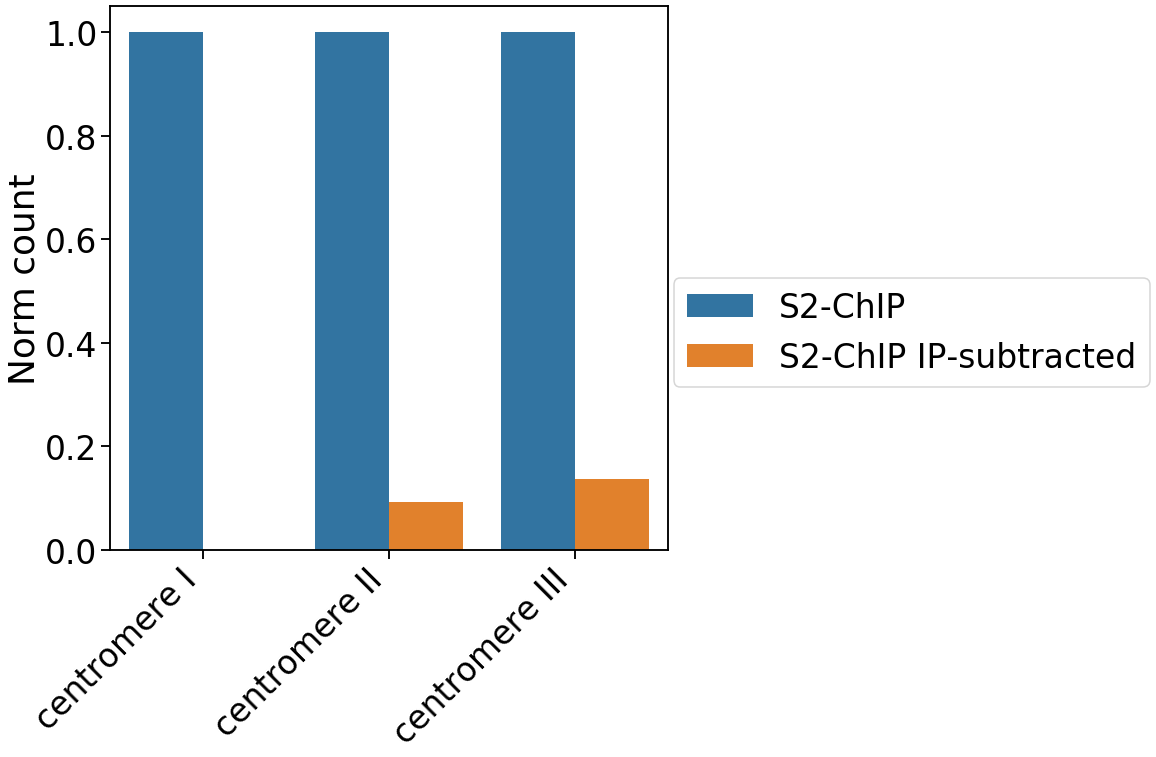

In [78]:
sns.set_context("talk", font_scale=2)
#sns.set_context("paper", font_scale=1.1)

fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(
    data=centromeric_df,
    x="gene_id", 
    #y="count",
    y="norm_count",
    hue="seq_category", ax=ax)

#ax.set_yscale("log")
ax.set_ylabel('Norm count')
#ax.set_xlabel('Region id')
ax.set_xlabel('')
#plt.xticks(rotation=45, ha='center')
plt.xticks(rotation=45, ha='right')


legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(legend_labels, ['S2-ChIP', 'S2-ChIP IP-subtracted'], bbox_to_anchor=(1.01, 0.5), borderaxespad=0)

plt.savefig(os.path.join(results_dir, plots_dir, "pct_left_in_centromeric_replicate_" + replicate_chip +".pdf"), bbox_inches='tight')
#plt.savefig(os.path.join(results_dir, plots_dir, "pct_left_in_centromeric_replicate_merged.pdf"), bbox_inches='tight')

- **Percentage left** of noise in counts

In [79]:
centromeric_ip_subtrated_tpm['pct_left'] = centromeric_ip_subtrated_tpm['count'] / centromeric_tpm['count']
centromeric_ip_subtrated_tpm

,gene_id,gene_name,length,type,category,count,seq_category,pct_left
0,centromer_I,NaN,10772,ip_region,ip_region,0.000,S2-ChIP_IP-subtracted,0.000000
1,centromer_II,NaN,9749,ip_region,ip_region,19.554,S2-ChIP_IP-subtracted,0.092454
2,centromer_III,NaN,12986,ip_region,ip_region,10.547,S2-ChIP_IP-subtracted,0.136090


for **other lambda**

In [80]:
# Example to find the average of the list
from statistics import mean, median

ll = max(global_lambdas.values())
#ll = mean(global_lambdas.values())
#ll = median([kk.round(3) for kk in global_lambdas.values()])
#ll = 0.954 # slightly different not sure why
ll

0.720816131433592

In [81]:
centromeric_ip_subtrated_tpm['new_count'] = centromeric_tpm['count'] - ll * centromeric_input_tpm['count']
# turn negative counts to zeros
centromeric_ip_subtrated_tpm['new_count'] = centromeric_ip_subtrated_tpm['new_count'].clip(lower=0)
# calculate reduction of noise percentage
centromeric_ip_subtrated_tpm['new_pct_left'] = centromeric_ip_subtrated_tpm['new_count'] / centromeric_tpm['count']
centromeric_ip_subtrated_tpm

,gene_id,gene_name,length,type,category,count,seq_category,pct_left,new_count,new_pct_left
0,centromer_I,NaN,10772,ip_region,ip_region,0.000,S2-ChIP_IP-subtracted,0.000000,0.000000,0.000000
1,centromer_II,NaN,9749,ip_region,ip_region,19.554,S2-ChIP_IP-subtracted,0.092454,24.808622,0.117298
2,centromer_III,NaN,12986,ip_region,ip_region,10.547,S2-ChIP_IP-subtracted,0.136090,18.393077,0.237330


------------

## Investigate INPUT subtraction **scaling factor**: $\lambda$

In [82]:
# Example to find the average of the list
from statistics import mean, median

- Check **agreement** between both **approaches** and **across regions**:

In [83]:
#abs(global_lambda - a)

**Global** norm factor

In [84]:
global_lambdas

{'centromer_I': 0.6447096941816569,
 'centromer_II': 0.5730120481927711,
 'centromer_III': 0.720816131433592}

In [85]:
mean_global_lambda = mean(list(global_lambdas.values()))
median_global_lambda = median(list(global_lambdas.values()))
len(global_lambdas)

3

In [86]:
mean_global_lambda
median_global_lambda

0.6447096941816569

**Local** norm factor (linear-regression)

In [87]:
lregression_lambdas
len(lregression_lambdas)

3

**Average** norm factor

In [88]:
# concatenate lists with '+' operator
mean_lambda = mean(list(lregression_lambdas.values()) + list(global_lambdas.values()) )
mean_lambda

0.5483079223255508

In [89]:
print(" Scaling factor (λ) used in the analysis: {:.3f}".format(mean_lambda))

 Scaling factor (λ) used in the analysis: 0.548


- Convert results to **Data Frame**

In [90]:
combined_lambdas = {key:[lregression_lambdas[key], global_lambdas[key]] for key in lregression_lambdas}
combined_lambdas['method'] = ['linear_regression', 'global_lambda']

lambda_df = pd.DataFrame.from_dict(combined_lambdas)
#lambda_df = lambda_df.melt(id_vars='method', var_name='chrom', value_name='input_factor')
lambda_df = lambda_df.melt(id_vars='method', var_name='region_id', value_name='input_factor')

In [91]:
lambda_df.head()

,method,region_id,input_factor
0,linear_regression,centromer_I,0.481362
1,global_lambda,centromer_I,0.644710
2,linear_regression,centromer_II,0.340248
3,global_lambda,centromer_II,0.573012
4,linear_regression,centromer_III,0.529700


In [92]:
lambda_df.shape

(6, 3)

- Add `ChIP` and `INPUT` **id's**:

In [93]:
lambda_df['chip_id'] = dataset_id
lambda_df['input_id'] = input_dataset_id

In [94]:
lambda_df.head()

,method,region_id,input_factor,chip_id,input_id
0,linear_regression,centromer_I,0.481362,WT_S2-ChIP_3,WT_S2-ChIP-INPUT_1
1,global_lambda,centromer_I,0.644710,WT_S2-ChIP_3,WT_S2-ChIP-INPUT_1
2,linear_regression,centromer_II,0.340248,WT_S2-ChIP_3,WT_S2-ChIP-INPUT_1
3,global_lambda,centromer_II,0.573012,WT_S2-ChIP_3,WT_S2-ChIP-INPUT_1
4,linear_regression,centromer_III,0.529700,WT_S2-ChIP_3,WT_S2-ChIP-INPUT_1


In [95]:
lambda_df.shape

(6, 5)

- Store as `.csv` file

In [96]:
#lambda_input_factors_file = os.path.join(out_dir, "INPUT_factors.csv")
#lambda_df.to_csv(lambda_input_factors_file, sep='\t', index=None)

#### **A**. Summarize results for **lambda coefficients** (across genes)

In [97]:
# 95th Percentile
def q95(x):
    return x.quantile(0.95)
# 98th Percentile
def q98(x):
    return x.quantile(0.98)

In [98]:
lambda_summary = lambda_df.groupby('method').agg(
    # Get max of the 'input_factor' column for each group
    max_if =('input_factor', max),
    # Get min of the 'input_factor' column for each group
    min_if=('input_factor', min),
    # Get mean of the 'input_factor' column for each group
    mean_if=('input_factor', mean),
    # Get median of the 'input_factor' column for each group
    median_if=('input_factor', 'median'),
    # Get standard deviation of the 'input_factor' column for each group
    std_if=('input_factor', 'std'),
    # Get 95th quantile of the 'input_factor' column for each group
    quantile_95_if=('input_factor', q95),
    # Get 98th quantile of the 'input_factor' column for each group
    quantile_98_if=('input_factor', q98),
    # Apply a lambda to date column
    #num_days=("date", lambda x: (max(x) - min(x)).days)    
)
lambda_summary

,max_if,min_if,mean_if,median_if,std_if,quantile_95_if,quantile_98_if
method,,,,,,,
global_lambda,0.720816,0.573012,0.646179,0.644710,0.073913,0.713205,0.717772
linear_regression,0.529700,0.340248,0.450437,0.481362,0.098439,0.524866,0.527766


#### **B**. Visualize distribution for **lambda coefficients** (across genes)

In [99]:
lambda_max = 5
#lambda_max = max(lambda_summary['quantile_98_if'])
lambda_max

5

In [100]:
lambda_plot = lambda_df[lambda_df['input_factor'] < lambda_max]
#lambda_plot = lambda_df[lambda_df['input_factor'] > lambda_max]
lambda_plot

,method,region_id,input_factor,chip_id,input_id
0,linear_regression,centromer_I,0.481362,WT_S2-ChIP_3,WT_S2-ChIP-INPUT_1
1,global_lambda,centromer_I,0.644710,WT_S2-ChIP_3,WT_S2-ChIP-INPUT_1
2,linear_regression,centromer_II,0.340248,WT_S2-ChIP_3,WT_S2-ChIP-INPUT_1
3,global_lambda,centromer_II,0.573012,WT_S2-ChIP_3,WT_S2-ChIP-INPUT_1
4,linear_regression,centromer_III,0.529700,WT_S2-ChIP_3,WT_S2-ChIP-INPUT_1
5,global_lambda,centromer_III,0.720816,WT_S2-ChIP_3,WT_S2-ChIP-INPUT_1


- Visualize lambda factor **distributions**

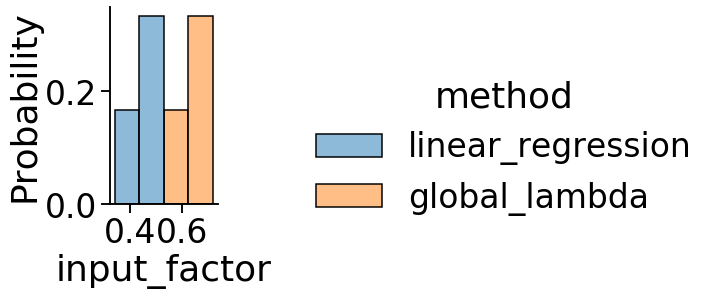

In [101]:
#sns.displot(lambda_plot, x="input_factor", hue="method", stat="density", common_norm=False)
ax = sns.displot(lambda_plot, x="input_factor", hue="method", stat="probability")

In [102]:
#sns.displot(lambda_plot, x="input_factor", col="method", multiple="dodge")

---

# Investigate counts after INPUT subtraction

---

- Get **input factor** calculated
    - **WT_S2-ChIP_1**: median / max
        - `WT_S2-ChIP-INPUT_1`: **0.988** / **1.409**

In [103]:
lambda_summary

,max_if,min_if,mean_if,median_if,std_if,quantile_95_if,quantile_98_if
method,,,,,,,
global_lambda,0.720816,0.573012,0.646179,0.644710,0.073913,0.713205,0.717772
linear_regression,0.529700,0.340248,0.450437,0.481362,0.098439,0.524866,0.527766


In [104]:
#input_factor = lambda_summary.loc['global_lambda']['median_if'].round(3)
#input_factor = lambda_summary.loc['global_lambda']['quantile_98_if'].round(3)
input_factor = lambda_summary.loc['global_lambda']['max_if'].round(3)

input_factor

0.721

- Load `TPM`/ `count` files:

In [105]:
use_counts=True
#use_counts=False

In [106]:
repeat_id = ''

### **INPUT** TPM file

In [107]:
if not use_counts:
    input_tpm_file = os.path.join(project_data_dir, "results", data_input_batch, "xp_data", input_dataset_id, input_dataset_id + "_pombe_tpm_matrix.csv")
else:
    input_tpm_file = os.path.join(project_data_dir, "results", data_input_batch, "xp_data", input_dataset_id, input_dataset_id + "_pombe_gene_count_matrix.csv")
print(input_tpm_file)

/gcm-lfs1/pablo/data/rna_silencing/results/INPUT/xp_data/WT_S2-ChIP-INPUT_1/WT_S2-ChIP-INPUT_1_pombe_gene_count_matrix.csv


In [108]:
input_tpm_df = pd.read_csv(input_tpm_file, sep='\t')
assert input_tpm_df['count'].isnull().values.any()
input_tpm_df.head()
#input_tpm_df[input_tpm_df['gene_id'].isin(all_htc_genes)]

,gene_id,count,gene_name,transcript_length,gene_length,type,category
0,SPBC460.01c,85.0,NaN,1719.0,1719,gene,gene
1,SPBC460.02c,61.0,NaN,663.0,948,gene,gene
2,SPBC460.03,108.0,vba2,1704.0,1704,gene,gene
3,SPBC460.04c,56.0,NaN,1176.0,1176,gene,gene
4,SPBC460.05,103.0,NaN,1593.0,1593,gene,gene


In [109]:
input_tpm_df.shape

(7021, 7)

- Check total number of `TPM`/ `count`
    - `WT_S2-ChIP-INPUT_1`: 
        - All genes: **1.000.000** / **815.040** 
        - mRNA gens: **966.056** / **785.347**
        - Repeats: **16.536** / **21.698**
        - Repeats (%): **1.65%** / **2.7%**

In [110]:
input_total_counts = input_tpm_df['count'].sum()
input_total_counts

815425.0

In [111]:
#input_tpm_df['category'].unique()
#input_tpm_df['type'].unique()
#input_tpm_df['count'][input_tpm_df['category'] == 'ribosomal'].sum() # 22.079

In [112]:
input_mrna_counts = input_tpm_df['count'][input_tpm_df['category'] == 'gene'].sum()
input_mrna_counts

785347.0

In [113]:
#input_tpm_df[input_tpm_df['category'] == 'repeat']
#input_tpm_df[input_tpm_df['gene_id'].isin(all_htc_genes)]
# gene_1 = input_tpm_df[input_tpm_df['category'] == 'repeat']['gene_id'].tolist()
# gene_2 = input_tpm_df[input_tpm_df['gene_id'].isin(all_htc_genes)]['gene_id'].tolist()
# set(gene_2).symmetric_difference(gene_1) # `all_htc_genes` is missing `mat locus` features and the annotated 'dg_repeat' and 'dh_repeat'

In [114]:
#input_htc_counts = input_tpm_df['count'][input_tpm_df['gene_id'].isin(all_htc_genes)].sum() # `all_htc_genes` is missing `mat locus` features and the annotated 'dg_repeat' and 'dh_repeat'
input_htc_counts = input_tpm_df['count'][input_tpm_df['category'] == 'repeat'].sum()
#input_htc_counts = input_total_counts - input_mrna_counts # there are also ribosomal!
input_htc_counts

21698.0

In [115]:
input_htc_ratio = input_htc_counts / input_total_counts
input_htc_ratio

0.026609436796762424

### **ChIP** TPM file - <font color='red'> **previous to INPUT subtraction** </font> 

In [116]:
if not use_counts:
    tpm_file = os.path.join(project_data_dir, "results", data_batch, "xp_data", dataset_id, dataset_id + "_pombe_tpm_matrix.csv")
else:
    tpm_file = os.path.join(project_data_dir, "results", data_batch, "xp_data", dataset_id, dataset_id + "_pombe_gene_count_matrix.csv")
print(tpm_file)

/gcm-lfs1/pablo/data/rna_silencing/results/S2-ChIP/xp_data/WT_S2-ChIP_3/WT_S2-ChIP_3_pombe_gene_count_matrix.csv


In [117]:
tpm_df = pd.read_csv(tpm_file, sep='\t')
assert tpm_df['count'].isnull().values.any()
tpm_df.head()
#tpm_df[tpm_df['gene_id'].isin(all_htc_genes)]

,gene_id,count,gene_name,transcript_length,gene_length,type,category
0,SPBC460.01c,439.0,NaN,1719.0,1719,gene,gene
1,SPBC460.02c,412.0,NaN,663.0,948,gene,gene
2,SPBC460.03,635.0,vba2,1704.0,1704,gene,gene
3,SPBC460.04c,120.0,NaN,1176.0,1176,gene,gene
4,SPBC460.05,230.0,NaN,1593.0,1593,gene,gene


In [118]:
tpm_df.shape

(7021, 7)

- Check total number of `TPM`/ `count`
    - `WT_S2-ChIP_1`: **wo** INPUT subtraction
        - All genes: **1.000.000** / **5.316.102** 
        - mRNA gens: **932.372** / **5.134.614**
        - Repeats: **7.559** / **50.453**
        - Repeats (%): **0.76%** / **0.95%**

In [119]:
tpm_total_counts = tpm_df['count'].sum()
tpm_total_counts

6349866.0

In [120]:
#tpm_df['category'].unique()
#tpm_df['type'].unique()
#tpm_df['count'][tpm_df['category'] == 'ribosomal'].sum() # 31.372

In [121]:
tpm_mrna_counts = tpm_df['count'][tpm_df['category'] == 'gene'].sum()
tpm_mrna_counts

6153197.0

In [122]:
#tpm_htc_counts = tpm_df['count'][tpm_df['gene_id'].isin(all_htc_genes)].sum() # `all_htc_genes` is missing `mat locus` features and the annotated 'dg_repeat' and 'dh_repeat'
tpm_htc_counts = tpm_df['count'][tpm_df['category'] == 'repeat'].sum()
#tpm_htc_counts = tpm_total_counts - tpm_mrna_counts # there are also ribosomal!
tpm_htc_counts

79927.0

In [123]:
tpm_htc_ratio = tpm_htc_counts / tpm_total_counts
tpm_htc_ratio

0.012587194753401096

### **ChIP** TPM file - <font color='red'>  **after INPUT subtraction** </font>

In [124]:
if not use_counts:
    input_subtracted_tpm_file = os.path.join(project_data_dir, "results", data_batch, "xp_data", dataset_id, dataset_id + "_subtracted_INPUT_pombe_tpm_matrix.csv")
else:
    input_subtracted_tpm_file = os.path.join(project_data_dir, "results", data_batch, "xp_data", dataset_id, dataset_id + "_subtracted_INPUT_pombe_gene_count_matrix.csv")
print(input_subtracted_tpm_file)

/gcm-lfs1/pablo/data/rna_silencing/results/S2-ChIP/xp_data/WT_S2-ChIP_3/WT_S2-ChIP_3_subtracted_INPUT_pombe_gene_count_matrix.csv


In [125]:
tpm_ip_subtracted_df = pd.read_csv(input_subtracted_tpm_file, sep='\t')
assert tpm_ip_subtracted_df['count'].isnull().values.any()
tpm_ip_subtracted_df.head()
#tpm_ip_subtracted_df[tpm_ip_subtracted_df['gene_id'].isin(all_htc_genes)]

,gene_id,count,gene_name,transcript_length,gene_length,type,category
0,FP565355_region_1..2120,249.135,NaN,2120.0,2120,region,repeat
1,FP565355_region_15417..15473,1.000,NaN,57.0,57,region,repeat
2,FP565355_region_15474..15608,15.390,NaN,135.0,135,region,repeat
3,FP565355_region_15609..16735,165.725,NaN,1127.0,1127,region,repeat
4,FP565355_region_16736..16794,3.000,NaN,59.0,59,region,repeat


In [126]:
tpm_ip_subtracted_df.shape

(7021, 7)

In [127]:
#tpm_ip_subtracted_df[tpm_ip_subtracted_df['gene_id'].isin(all_htc_genes)]['count']

- <font color='red'> **Attention!** 
    - After INPUT subtraction there are counts with negative values!
    - After removing negative counts we **DO NOT HAVE TPM anymore (need to re-scale)!** </font>
=> **Not anymore bug has been fixed!**

In [128]:
tpm_ip_subtracted_df[tpm_ip_subtracted_df['count'] < 0]

,gene_id,count,gene_name,transcript_length,gene_length,type,category


In [129]:
# turn negative counts to zeros
tpm_ip_subtracted_df['count'] = tpm_ip_subtracted_df['count'].clip(lower=0)
#tpm_ip_subtracted_df

In [130]:
# re-scale to add to 10^6
if not use_counts:
    
    ## Sum up all the RPK values in a sample and divide this number by 1,000,000.
    per_million = tpm_ip_subtracted_df['count'].sum() / (10 ** 6)
    #per_million

    ## Divide the RPK values by the 'per million' scaling factor.
    tpm_ip_subtracted_df['count'] = tpm_ip_subtracted_df['count'] / per_million

- Check total number of `TPM`/ `count`
    - `WT_S2-ChIP_1`: **with** INPUT subtraction
        - All genes: **1.000.000** / **4.294.217** 
        - mRNA gens: **926.664**  / **4.154.434**
        - Repeats: **4.014** / **20.012**
        - Repeats (%): **0.40%** / **0.47%**

In [131]:
tpm_ip_subtracted_total_counts = tpm_ip_subtracted_df['count'].sum()
tpm_ip_subtracted_total_counts

5863447.345000001

In [132]:
#tpm_ip_subtracted_df['category'].unique()
#tpm_ip_subtracted_df['type'].unique()
#tpm_ip_subtracted_df['count'][tpm_ip_subtracted_df['category'] == 'ribosomal'].sum() # 20

In [133]:
tpm_ip_subtracted_mrna_counts = tpm_ip_subtracted_df['count'][tpm_ip_subtracted_df['category'] == 'gene'].sum()
tpm_ip_subtracted_mrna_counts

5686134.220000001

In [134]:
#tpm_ip_subtracted_htc_counts = tpm_ip_subtracted_df['count'][tpm_ip_subtracted_df['gene_id'].isin(all_htc_genes)].sum() # `all_htc_genes` is missing `mat locus` features and the annotated 'dg_repeat' and 'dh_repeat'
tpm_ip_subtracted_htc_counts = tpm_ip_subtracted_df['count'][tpm_ip_subtracted_df['category'] == 'repeat'].sum()
#tpm_ip_subtracted_htc_counts = tpm_ip_subtracted_total_counts - tpm_ip_subtracted_mrna_counts
tpm_ip_subtracted_htc_counts

65931.79

In [135]:
tpm_ip_subtracted_htc_ratio = tpm_ip_subtracted_htc_counts / tpm_ip_subtracted_total_counts
tpm_ip_subtracted_htc_ratio

0.01124454371645764

---

- Recompute `INPUT` **subtraction** from files:

In [136]:
# new_tpm_ip_subtracted_df = tpm_df.merge(
#     input_tpm_df[['gene_id', 'count']],
#     how = 'inner',
#     on='gene_id',
#     suffixes=['_chip', '_ip']
# )

In [137]:
df_list = [ df.set_index(['gene_id']) for df in [
    tpm_df.rename(columns={"count": "count_chip"}), 
    input_tpm_df[['gene_id', 'count']].rename(columns={"count": "count_ip"}), 
    tpm_ip_subtracted_df[['gene_id', 'count']].rename(columns={"count": "count_ip_subtracted"}) 
]]

new_tpm_ip_subtracted_df = pd.concat(
    df_list ,
    join='inner',
    axis=1
).reset_index()

In [138]:
new_tpm_ip_subtracted_df.head()

,gene_id,count_chip,gene_name,transcript_length,gene_length,type,category,count_ip,count_ip_subtracted
0,SPBC460.01c,439.0,NaN,1719.0,1719,gene,gene,85.0,384.175
1,SPBC460.02c,412.0,NaN,663.0,948,gene,gene,61.0,372.655
2,SPBC460.03,635.0,vba2,1704.0,1704,gene,gene,108.0,565.340
3,SPBC460.04c,120.0,NaN,1176.0,1176,gene,gene,56.0,83.880
4,SPBC460.05,230.0,NaN,1593.0,1593,gene,gene,103.0,163.565


In [139]:
new_tpm_ip_subtracted_df.shape

(7021, 9)

Compute **new subtraction** - merge DataFames

In [140]:
new_tpm_ip_subtracted_df['count_new_ip_subtracted'] = new_tpm_ip_subtracted_df['count_chip'] - input_factor * new_tpm_ip_subtracted_df['count_ip'].fillna(0)
new_tpm_ip_subtracted_df.head()

,gene_id,count_chip,gene_name,transcript_length,gene_length,type,category,count_ip,count_ip_subtracted,count_new_ip_subtracted
0,SPBC460.01c,439.0,NaN,1719.0,1719,gene,gene,85.0,384.175,377.715
1,SPBC460.02c,412.0,NaN,663.0,948,gene,gene,61.0,372.655,368.019
2,SPBC460.03,635.0,vba2,1704.0,1704,gene,gene,108.0,565.340,557.132
3,SPBC460.04c,120.0,NaN,1176.0,1176,gene,gene,56.0,83.880,79.624
4,SPBC460.05,230.0,NaN,1593.0,1593,gene,gene,103.0,163.565,155.737


In [141]:
new_tpm_ip_subtracted_df.shape

(7021, 10)

- <font color='red'> **Attention!** 
    - After INPUT subtraction there are counts with negative values! Turn these into zeros!\

In [142]:
#new_tpm_ip_subtracted_df[new_tpm_ip_subtracted_df['count_new_ip_subtracted'] < 0]

In [143]:
# turn negative counts to zeros
new_tpm_ip_subtracted_df['count_new_ip_subtracted'] = new_tpm_ip_subtracted_df['count_new_ip_subtracted'].clip(lower=0)
#new_tpm_ip_subtracted_df

Compute **TPM** expression

In [144]:
from gene_counts import get_tpm_gene_counts

In [145]:
#new_tpm_ip_subtracted_df['tpm_new_ip_subtracted']
new_tpm_ip_subtracted_df = new_tpm_ip_subtracted_df.merge(
    get_tpm_gene_counts(
        new_tpm_ip_subtracted_df,
        count_col='count_new_ip_subtracted', 
        length_col='gene_length', 
        read_length = 50
    ).rename(columns={"count_new_ip_subtracted": "tpm_new_ip_subtracted"})[['gene_id', 'tpm_new_ip_subtracted']],
    how = 'inner',
    on='gene_id'
)


Calculated TPM for 7021 genes.
Used `length_col`: gene_length for normalization.


In [146]:
new_tpm_ip_subtracted_df[new_tpm_ip_subtracted_df['gene_id'].isin(all_htc_genes)]

,gene_id,count_chip,gene_name,transcript_length,gene_length,type,category,count_ip,count_ip_subtracted,count_new_ip_subtracted,tpm_new_ip_subtracted
5,SPAC212.11b,5818.0,tlh1_plus,5662.0,5662,gene,repeat,1300.0,4979.500,4880.700,298.978118
6,SPAC212.11,5818.0,tlh1,5662.0,5662,gene,repeat,1300.0,4979.500,4880.700,298.978118
7,SPAC212.10b,397.0,SPAC212.10_plus,606.0,606,gene,repeat,92.0,337.660,330.668,204.121760
8,SPAC212.10,397.0,NaN,606.0,606,gene,repeat,92.0,337.660,330.668,204.121760
9,SPAC212.09c,1200.0,NaN,1656.0,1656,gene,repeat,272.0,1024.560,1003.888,214.793788
10,SPNCRNA.70,167.0,NaN,530.0,530,gene,repeat,98.0,103.790,96.342,68.868863
11,SPAC212.08c,436.0,NaN,1211.0,1211,gene,repeat,206.0,303.130,287.474,85.063799
12,SPAC212.07c,50.0,NaN,891.0,891,gene,repeat,42.0,22.910,19.718,8.051988
14,SPAC212.12,182.0,NaN,372.0,372,gene,repeat,72.0,135.560,130.088,138.479997
15,SPAC212.06c,547.0,NaN,891.0,933,gene,repeat,167.0,439.285,426.593,165.925751


- Try to infer `INPUT` **subtraction factor** used in analysis


In [147]:
new_tpm_ip_subtracted_df['infered_factor'] = (new_tpm_ip_subtracted_df['count_chip'] - new_tpm_ip_subtracted_df['count_ip_subtracted']) /  new_tpm_ip_subtracted_df['count_ip']
#new_tpm_ip_subtracted_df['infered_factor'] = (new_tpm_ip_subtracted_df['count_chip'] - new_tpm_ip_subtracted_df['count_new_ip_subtracted']) /  new_tpm_ip_subtracted_df['count_ip']
new_tpm_ip_subtracted_df

,gene_id,count_chip,gene_name,transcript_length,gene_length,type,category,count_ip,count_ip_subtracted,count_new_ip_subtracted,tpm_new_ip_subtracted,infered_factor
0,SPBC460.01c,439.0,NaN,1719.0,1719,gene,gene,85.0,384.175,377.715,77.767850,0.645
1,SPBC460.02c,412.0,NaN,663.0,948,gene,gene,61.0,372.655,368.019,140.754692,0.645
2,SPBC460.03,635.0,vba2,1704.0,1704,gene,gene,108.0,565.340,557.132,115.747718,0.645
3,SPBC460.04c,120.0,NaN,1176.0,1176,gene,gene,56.0,83.880,79.624,24.292511,0.645
4,SPBC460.05,230.0,NaN,1593.0,1593,gene,gene,103.0,163.565,155.737,34.681418,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...
7016,SPRRNA.51,NaN,NaN,165.0,165,gene,gene,NaN,NaN,NaN,NaN,NaN
7017,SPRRNA.52,NaN,NaN,165.0,165,gene,gene,NaN,NaN,NaN,NaN,NaN
7018,SPRRNA.55,NaN,NaN,115.0,115,gene,gene,NaN,NaN,NaN,NaN,NaN
7019,SPSNORNA.18,NaN,snoU24,47.0,47,gene,gene,NaN,NaN,NaN,NaN,NaN


In [148]:
#new_tpm_ip_subtracted_df[new_tpm_ip_subtracted_df['infered_factor'] != input_factor]

In [149]:
new_tpm_ip_subtracted_df[new_tpm_ip_subtracted_df['infered_factor'] > 10]

,gene_id,count_chip,gene_name,transcript_length,gene_length,type,category,count_ip,count_ip_subtracted,count_new_ip_subtracted,tpm_new_ip_subtracted,infered_factor


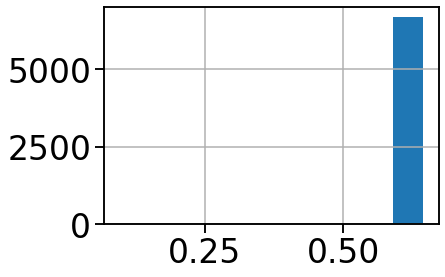

In [150]:
new_tpm_ip_subtracted_df['infered_factor'].hist()